In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

DIR = "/home/julian/Documents/ndnrtc_testing/evaluation/reTrans_evaluation_results"

# read in csv file
df = pd.read_csv(DIR + '/run_overview.csv', delimiter='\t', index_col=False)

# transform columns names to lower case
df.columns = [col.lower() for col in df]

# ensuring backwards compatibility
df.rename(columns={"adaption":"init._res."}, inplace=True)

# ensuring forwards compatibility
df.rename(columns={"retr._total":"retransmissions", 
                   "al_seq.len.":"al_seq_len"}, inplace=True)

df.head(10)

,setting,run,init._res.,adaption_logic,shaping_profile,bandwith(cons),al_w1,al_w2,al_th1,al_th2,al_seq_len,frames_missing,retr._max,retransmissions,psnr,ssim,vmaf
0,1,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,1051,75,931,15.23,0.694953,38.218117
1,1,1,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,976,89,500,19.19,0.677450,37.759937
2,1,2,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,646,247,595,16.27,0.573160,38.615331
3,1,3,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,506,262,832,14.65,0.574026,38.893652
4,1,4,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,527,762,1339,15.11,0.535138,39.707945
5,1,5,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,447,110,413,15.88,0.600672,39.186416
6,1,6,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,978,100,700,19.33,0.672282,38.355218
7,1,7,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,479,158,606,17.46,0.652198,42.629747
8,1,8,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,706,179,1092,17.46,0.652198,42.629747
9,1,9,med,ReTrans,HLH,-----,0.7,1.3,1,3,1,646,247,587,16.27,0.573049,38.698794


In [2]:
# get list of setting numbers without duplicates
settingNumbers = df["setting"].unique()
# create empty list
list_tmp = []

for setting in settingNumbers:
    # get all runs within a setting
    group = df[df["setting"] == setting]
    
    # get first line of that group as DataFrame
    part1 = pd.DataFrame(group[:1])
    # cut off last few columns and reset index to 0
    part1 = part1[part1.columns[:-6]].reset_index().drop("index", axis = 1)
    
    # calculate mean values for group, transpose and cut off first few columns   
    part2 = pd.DataFrame(group.mean()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part2.columns:
        part2.rename(columns={col:col+"_mean"}, inplace=True)
    
    # calculate std deviation values for group, transpose and cut off first few columns   
    part3 = pd.DataFrame(group.std()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part3.columns:
        part3.rename(columns={col:col+"_std"}, inplace=True)
        
    # put parts together and store row in list
    list_tmp.append(pd.concat([part1, part2, part3], axis=1, ignore_index=False))

# concatenate all rows in list into a DataFrame
df_c = pd.concat(list_tmp, axis=0, ignore_index=True, sort=False)
df_c.head()

,setting,run,init._res.,adaption_logic,shaping_profile,bandwith(cons),al_w1,al_w2,al_th1,al_th2,...,retransmissions_mean,psnr_mean,ssim_mean,vmaf_mean,frames_missing_std,retr._max_std,retransmissions_std,psnr_std,ssim_std,vmaf_std
0,1,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,...,759.5,16.685,0.620513,39.469490,226.764587,201.966141,289.130209,1.639907,0.055588,1.747910
1,2,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,...,444.1,16.871,0.685121,39.959549,352.551021,42.827950,103.036617,1.997150,0.039315,3.269309
2,3,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,...,992.1,16.473,0.661867,40.376462,232.416198,327.476021,435.046983,1.570061,0.035171,2.540037
3,4,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,...,649.6,17.781,0.683895,42.572621,332.708898,63.184035,598.652784,1.370097,0.035147,3.378176
4,5,0,med,ReTrans,HLH,-----,0.7,1.3,1,3,...,316.8,18.890,0.721616,46.130068,105.147727,15.427249,79.735396,0.696962,0.016847,0.692171


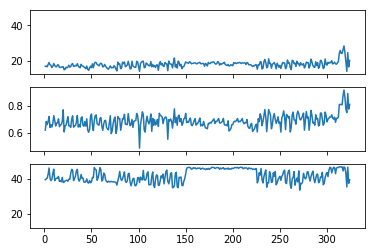

In [3]:
t = df_c["setting"]
s1 = df_c["psnr_mean"]
s2 = df_c["ssim_mean"]
s3 = df_c["vmaf_mean"]

graph1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(graph1.get_xticklabels(), visible=False)

# share x only
graph2 = plt.subplot(312, sharex=graph1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(graph2.get_xticklabels(), visible=False)

# share x and y
graph3 = plt.subplot(313, sharex=graph1, sharey=graph1)
plt.plot(t, s3)
plt.show()

In [4]:
def addBarGroup (ax, df_f, parameter, parameter_values, parameter_lables, metric, offset, group_color):
    
    width = 1  # the width of the bars
    gap = 1 # the gap between groups of bars
    
    for i in range(len(parameter_values)):
        
        # prepare parameters
        value = parameter_values[i]
        postition = (i + offset) * width
        
        # get values
        bar = (df_f[df_f[parameter] == value].mean()[metric])
        bar_err = (df_f[df_f[parameter] == value].std()[metric])  
        
        # draw bars
        rect = ax.bar(postition, bar , width, yerr=bar_err, label=value, 
                      color=group_color, edgecolor="black", capsize=3)
        
        # add annotation
        textPos = rect[0].get_height()/2
        plt.text(postition, textPos, parameter_lables[i], color='white', 
                ha='center', va='center', size='x-large', rotation=90)


In [5]:
def drawCustomBarPlot (metric):
    
    # prepare parameters
    al_w1_fixed = 1.0
    al_w2_fixed = 1.0
    al_th1_fixed = 5
    al_th2_fixed = 15
    al_seq_len_fixed = 3
    
    # filter data according to fixed parameters
    df_f1 = df[(df.al_th1 == al_th1_fixed) 
             & (df.al_th2 == al_th2_fixed)
             & (df.al_seq_len == al_seq_len_fixed)]
    
    df_f2 = df[(df.al_w1 == al_w1_fixed) 
             & (df.al_w2 == al_w2_fixed) 
             & (df.al_seq_len == al_seq_len_fixed)]
    
    df_f3 = df[(df.al_w1 == al_w1_fixed) 
             & (df.al_w2 == al_w2_fixed) 
             & (df.al_th1 == al_th1_fixed) 
             & (df.al_th2 == al_th2_fixed)]
    
    # draw the bars
    fig, ax = plt.subplots()
    addBarGroup(ax, df_f1, "al_w1", [0.7,1.0,1.3], ['0.7 | 1.3','1.0 | 1.0','1.3 | 0.7'], metric, 0, "blue")
    addBarGroup(ax, df_f2, "al_th1", [1,2,5,10,20], ['1 | 3','2 | 6','5 | 15','10 | 30','20 | 60'], metric, 4, "green")
    addBarGroup(ax, df_f3, "al_seq_len", [1,2,3,4,5], ['1','2','3','4','5'], metric, 10, "red")
    
    # add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_title('Influence of Adaption Logic Parameters')
    ax.set_xticks([1,6,12])
    ax.set_xticklabels(('weights with\n' + 
                        'thresholds = ' + str(al_th1_fixed) + ' | ' + str(al_th2_fixed) + '\n' + 
                        'sequ. length = ' + str(al_seq_len_fixed), 
                        'thresholds with\n'
                        'weights = ' + str(al_w1_fixed) + ' | ' + str(al_w2_fixed) + '\n' +
                        'sequ. length = ' + str(al_seq_len_fixed), 
                        'sequence lengths with\n'
                        'weights = ' + str(al_w1_fixed) + ' | ' + str(al_w2_fixed) + '\n' +
                        'thresholds = ' + str(al_th1_fixed) + ' | ' + str(al_th2_fixed)))
    plt.tight_layout()
    plt.savefig(DIR + "/reTrans_" + metric + ".pdf")

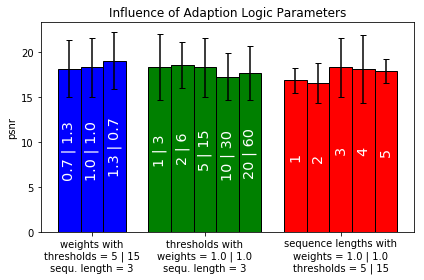

In [6]:
drawCustomBarPlot("psnr")

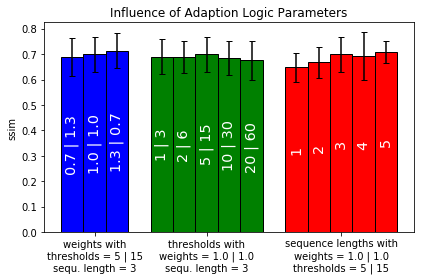

In [7]:
drawCustomBarPlot("ssim")

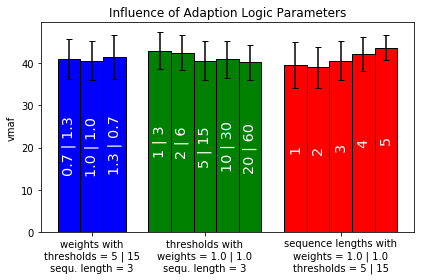

In [8]:
drawCustomBarPlot("vmaf")

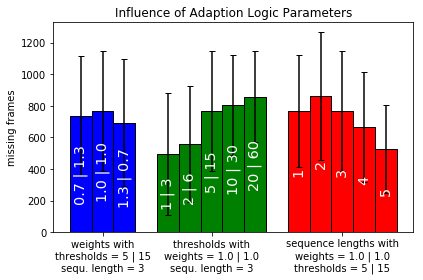

In [9]:
metric = "frames_missing"
drawCustomBarPlot(metric)
plt.ylabel("missing frames")
plt.savefig(DIR + "/reTrans_" + metric + ".pdf")

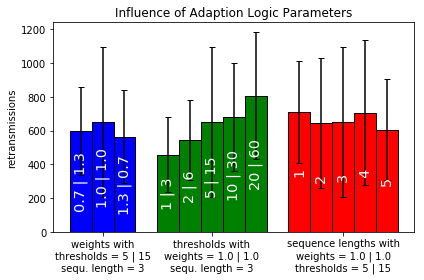

In [10]:
drawCustomBarPlot("retransmissions")

In [11]:
df_c.to_csv(DIR + "/run_overview_means_pandas.csv")